# Demo for shear locking


In [57]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Beam bending

The problem: Beam length $L$, height $2a$, and thickness $b$. Fixed on the right hand side. Loaded by a force $P$ on the left hand side with a magnitude of $-0.3 N$ pointing downwards. (p. 531 in AF Bower, Applied Mechanics of Solids)

### Theoretical solution
Suppose the origin locates at the center on the left of the beam.

$$
\begin {align}

M(x) &= Px  \\
M(x) &= - \int {y \sigma_x dA}  \\
\int {\sigma_x dA} &= 0  \\

\end {align}
$$


Assume the radius of the beam neutral axis to be $R$, considering that the neutral axis is at $y=0$, so

$$
\begin {align}

x(y) &= y \theta  \\
x_0 &= R \theta  \\

\varepsilon_x & = \frac {x(y)} {x_0} = \frac {y} {R}  \\
\sigma_x &= E \varepsilon_x  = \frac {Ey}{R}  \\  

\end {align}
$$

So,

$$
\begin {align}

M(x) &= - \int {\frac {Ey^2}{R} dA} = -\frac {EI_x} {R} \\
I_x &= \int {y^2 dA} = \frac {2a^3b} {3} = \frac {(2a)^3b} {12}  \\

R &= -\frac {EI_x} {M(x)}  \\
\sigma_x &=  -\frac {M(x) y} {I_x} = -\frac {P x y} {I_x}  \\

\end {align}
$$

Deflection:

$$
\begin {align}

\frac {\partial^2 u_y} {\partial x^2} &= \frac {1} {R} = -\frac {M(x)} {EI_x} = -\frac {Px} {EI_x}   \\
\frac {\partial u_y} {\partial x} &= -\frac {Px^2} {2EI_x} + C_1  \\
u_y &= -\frac {Px^3} {6EI_x} + C_1 x + C_2  \\
u_y(L) &= 0, \frac {\partial u_y} {\partial x} \Big|_{x=L} = 0 \\

C_1 &= \frac {PL^2} {2E I_x} = CL^2  \\
C_2 &= -\frac {PL^3} {3E I_x}  \\


\end {align}
$$

### Airy function solution of the problem
$$
\begin {align}

\mu &= \frac {E} {2(1+\nu)}  \\

I_x &= \frac {2a^3b} {3} = \frac {(2a)^3b} {12} \\
A &= \frac {P} {4Ea^3b} = \frac {P} {6 E I_x}  \\
c &= 0 \\
d &= - \frac {PL^3} {2Ea^3b} = - 2AL^3  \\
\omega &= \frac {3PL^2} {4Ea^3b} = \frac {PL^2} {2E I_x} = 3AL^2  \\

u_x &= 3A x^2y - A(2+\nu) y^3 + 6A(1+\nu) a^2y-\omega y + c  \\
u_y &= -\nu 3A xy^2 - Ax^3 + \omega x + d

\end {align}
$$




$$
\begin {align}

\varepsilon_{xx} &= \frac {\partial u_x} {\partial x} = 6Axy  \\
\varepsilon_{yy} &= \frac {\partial u_y} {\partial y} = -6 \nu Axy  \\
\varepsilon_{xy} &= \frac {1}{2}(\frac {\partial u_x} {\partial y} + \frac {\partial u_y} {\partial x})  \nonumber \\
&= \frac {1}{2} [(3Ax^2-3A(2+\nu)y^2+6A(1+\nu)a^2-\omega) + (-3\nu Ay^2-3Ax^2+\omega)]  \\

\end {align}
$$

In [58]:
a = 0.15
b = 1.
P = 2*a*b
L = 10.
mu = 10000.
nu = 0.0

E = 2*mu*(1+nu)
I = (2*a)**3*b/12

C1 = P*L**2/(2*E*I)
C2 = -C1*L*2/3

def u_y(x, y):
    return -P*x**3/(6*E*I)+C1*x+C2

def duydx(x, y):
    return -P*x**2/(2*E*I)+C1

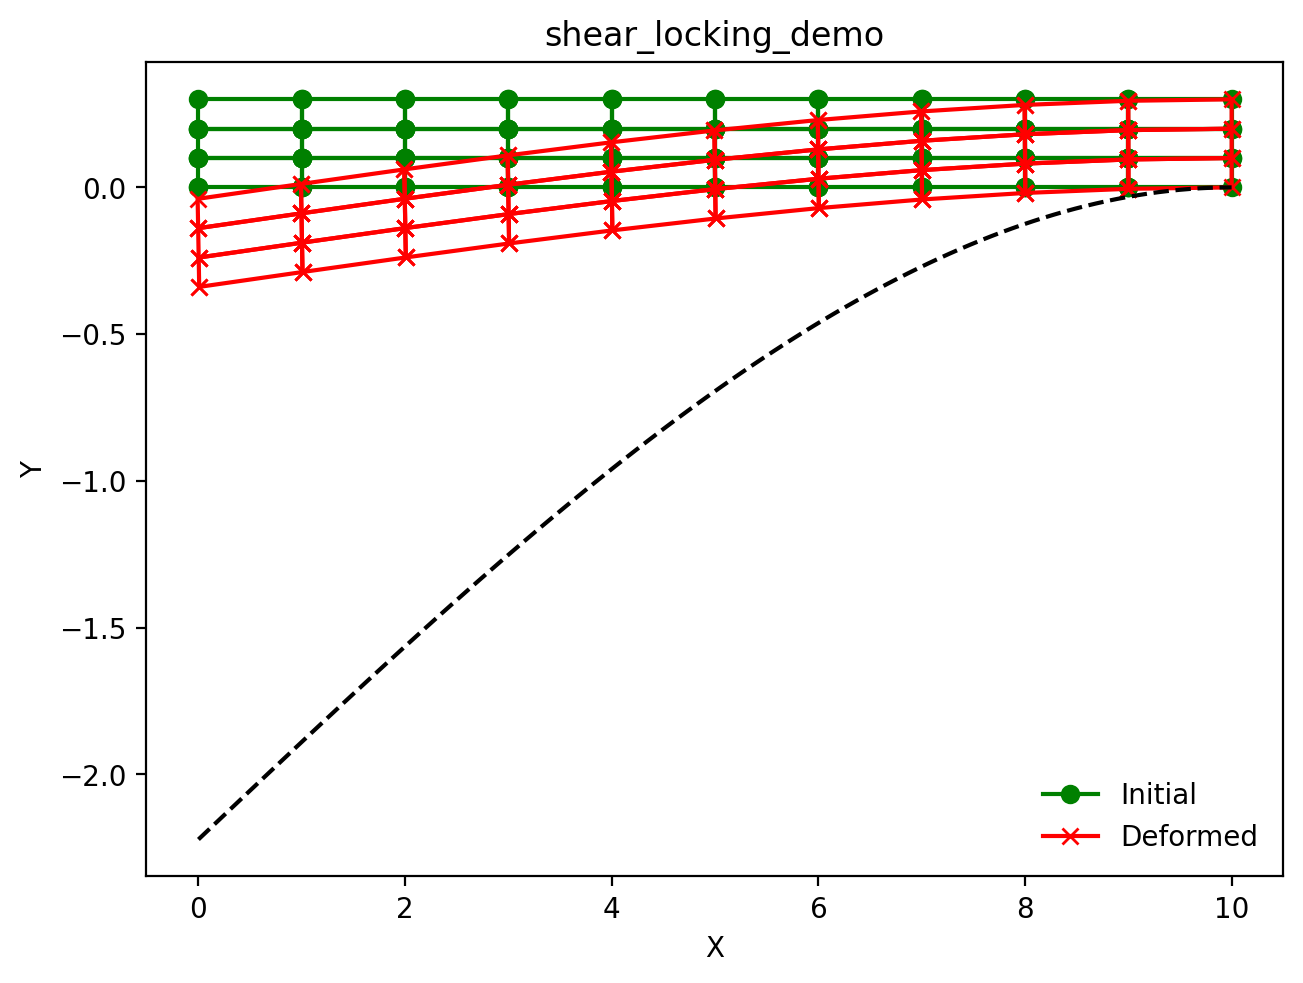

In [59]:
import numpy as np

from pyfea.femodel import FEModel
import matplotlib.pyplot as plt

inp_fpath = '../src/sample_code_matlab_Bower/shear_locking_demo.txt'
model = FEModel(inp_fpath=inp_fpath, inp_format='bower')  # inp_fpath, inp_format, el_type
model.set_up()
model.solve()

fig, ax = model.plot_domain(out_path='.')

x = np.linspace(0, L, 100)
y = u_y(x, 0)

ax.plot(x, y, color='black', linestyle='--', label='Analytical solution')

fig

Analyze the lower left element (iel=0).

Element info:
| Node # |   x   |   y   |
|--------|-------|-------|
|    0   |  0.0  |  0.0  |
|    1   |  1.0  |  0.0  |
|   20   |  1.0  |  0.1  |
|   21   |  0.0  |  0.1  |



In [60]:
element = model.Elements[9]

for i in range(element.nelnodes):
    print(element.nodes[i], element.nodes_x0[i], element.nodes_x[i])


9 [9. 0.] [ 9.00144933e+00 -4.93694435e-03]
10 [10.  0.] [1.00000000e+01 9.34586155e-15]
11 [10.   0.1] [10.         0.0999957]
12 [9.  0.1] [9.00048255 0.09506418]


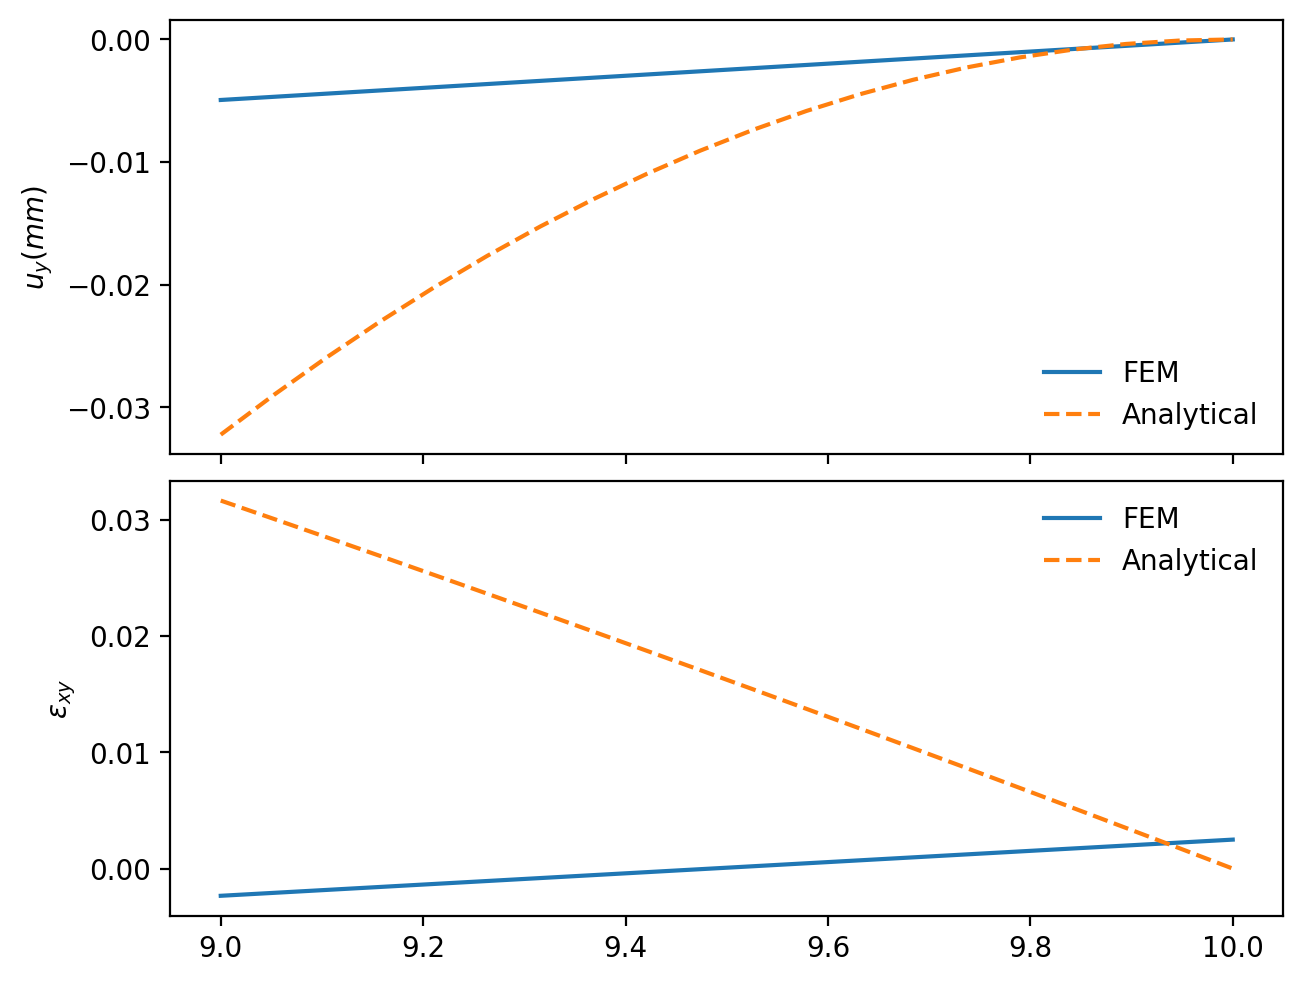

In [64]:
xix = np.linspace(-1, 1, 20)
xiy = 0.
strains = []
x0s = []
xs = []

for xi in xix:
    strains.append(element.get_strain(np.array([xi, xiy])))
    x0s.append(element.get_x0(np.array([xi, xiy])))
    xs.append(element.get_x(np.array([xi, xiy])))
strains = np.array(strains)
x0s = np.array(x0s)
xs = np.array(xs)
us = xs - x0s

uy_analytical = u_y(x0s[:, 0], x0s[:, 1])
strain_analytical = duydx(x0s[:, 0], x0s[:, 1])/2


fig, axs = plt.subplots(nrows=2, sharex=True)
axs[0].plot(x0s[:, 0], us[:, 1], label='FEM')
axs[0].plot(x0s[:, 0], uy_analytical, label='Analytical', linestyle='--')
axs[0].legend(frameon=False)
axs[0].set_ylabel('$u_y (mm)$')

axs[1].plot(x0s[:, 0], strains[:, 0, 1], label='FEM')
axs[1].plot(x0s[:, 0], strain_analytical, label='Analytical', linestyle='--')
axs[1].legend(frameon=False)
axs[1].set_ylabel('$\\varepsilon_{xy}$')

fig